# Quickstart Guide

**If you are new to MatrixProfile concepts, please read the following article before continuing:**<br />
[Introduction To Matrix Profiles](https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90)

MatrixProfile enables you to quickly and easily analyze a time series. At it's core, the module is made of 4 primary concepts.

**1. [Analyze](api.rst#matrixprofile.analyze)**

Analyze is a "pipeline" that lets you quickly compute the MatrixProfile or Pan-MatrixProfile, discover motifs, discover discords and visualize the results.

**2. [Compute](api.rst#matrixprofile.compute)**

Compute simply computes the MatrixProfile or Pan-MatrixProfile.

**3. [Discover](api.rst#matrixprofile.discover.motifs)**

Discover is a module composed of algorithms that are used on top of a computed MatrixProfile or Pan-MatrixProfile. For example, you cannot find any discords or motifs without first computing the MatrixProfile or Pan-MatrixProfile.

**4. [Visualize](api.rst#matrixprofile.visualize)**

Visualize provides some out of the box plots. Currently, plots for the MatrixProfile, Pan-MatrixProfile, Motifs and Discords is supported.

In this quickstart guide, you will learn how to apply these concepts and start analyzing your time series data. We also cover the core data structures generated from the "compute" algorithms. These data structures are critical in order for the other higher level functions to work (discover and visualize).

## Import Modules

By convention, we import the MatrixProfile library as **mp**; similar to importing numpy as **np**. Here we simply import matrixprofile, import numpy and load a synthetic time series. We also import matplotlib to visualize the data.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp

%matplotlib inline

In [2]:
dataset = mp.datasets.load('motifs-discords-small')
ts = dataset['data']

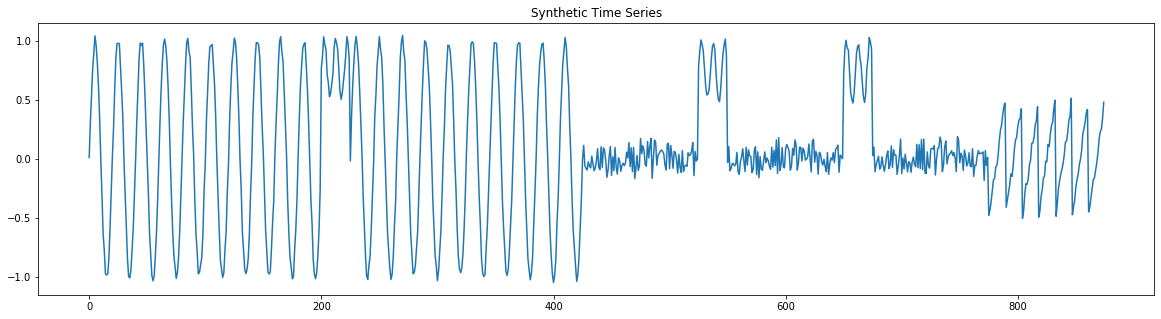

In [3]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(ts)), ts)
plt.title('Synthetic Time Series')
plt.show()

## Analyzing Pan-MatrixProfile

In this section, we illustrate how to use the analyze function to compute the Pan-MatrixProfile, discover the motifs, discover the discords and to visualize this information. When a time series is passed to the analyze function without any windows, the **maximum_subsequence** algorithm is used to determine what makes sense. It uses **Pearson Correlation** to determine when the upper window is found based on a default threshold of **0.98**. This is the quickest way to obtain interesting insights into your time series.

This example only illustrates passing in no windows, however you should spend time reading the [analyze API docs](api.rst#matrixprofile.analyze) for details on arguments.

/home/tyler/src/matrixprofile/matrixprofile/visualize.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


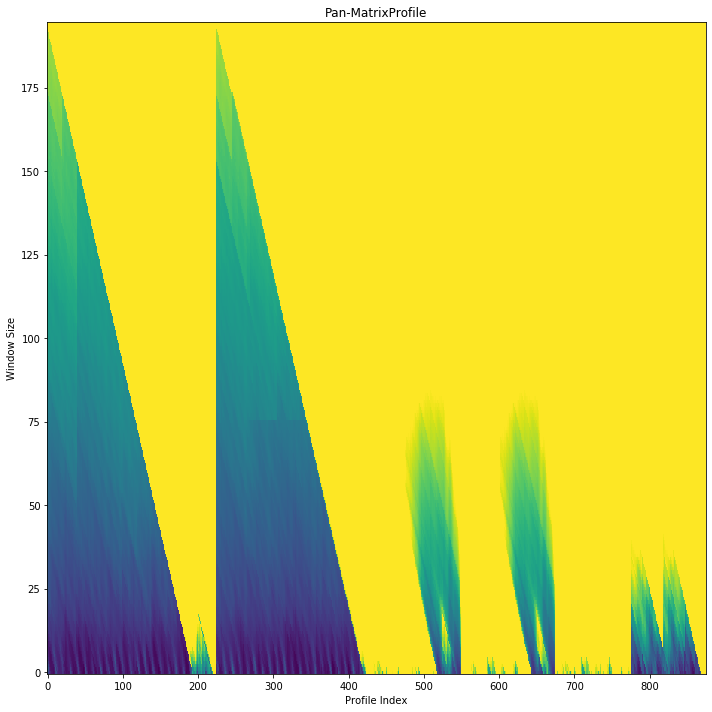

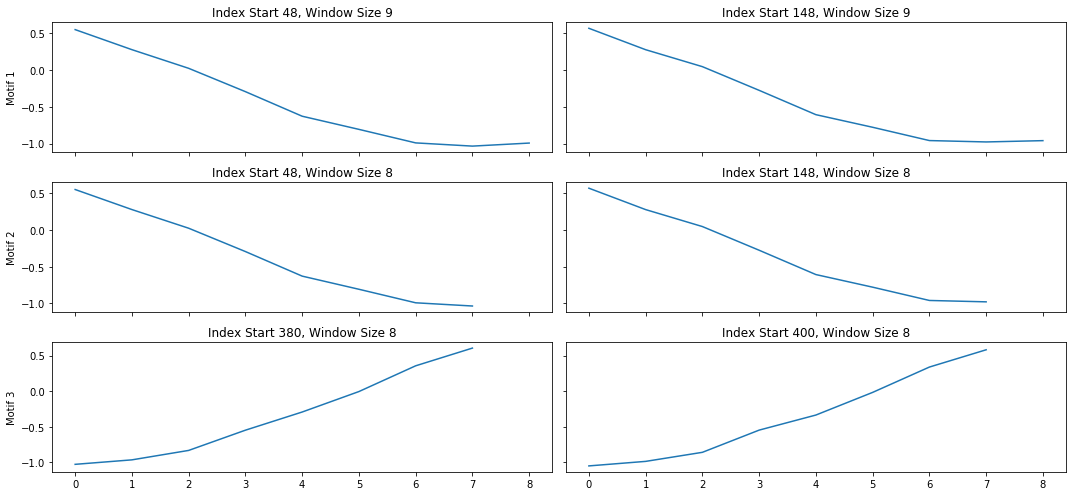

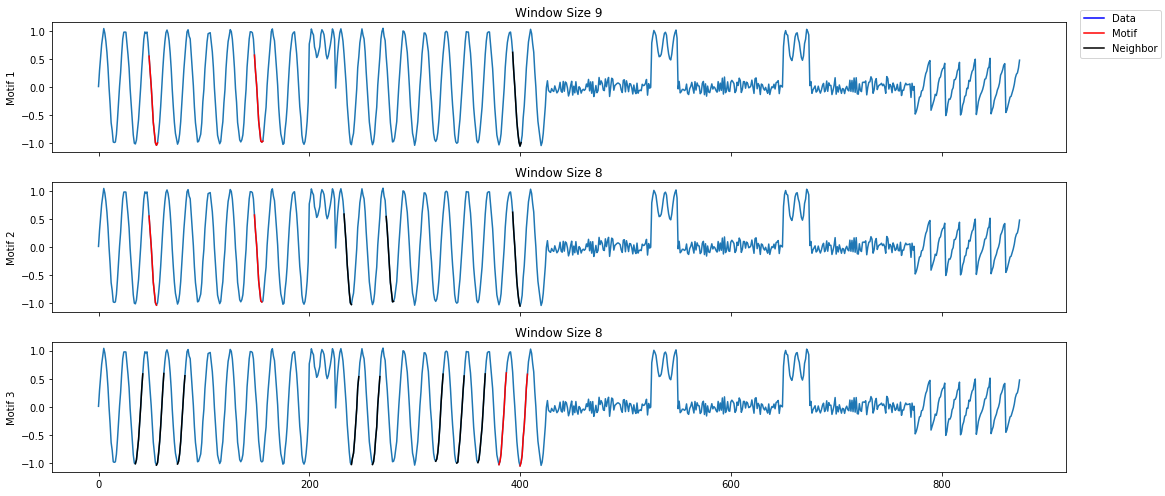

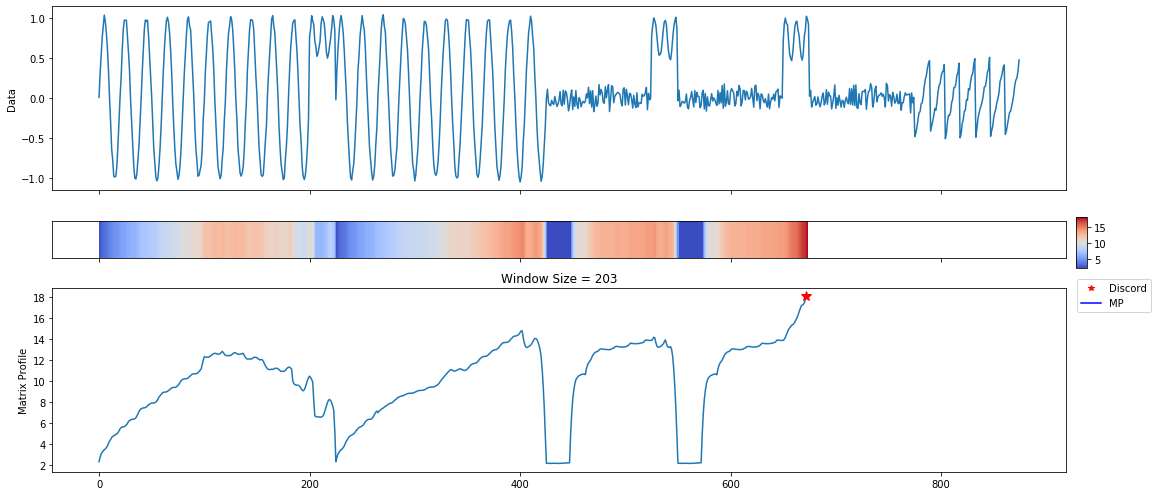

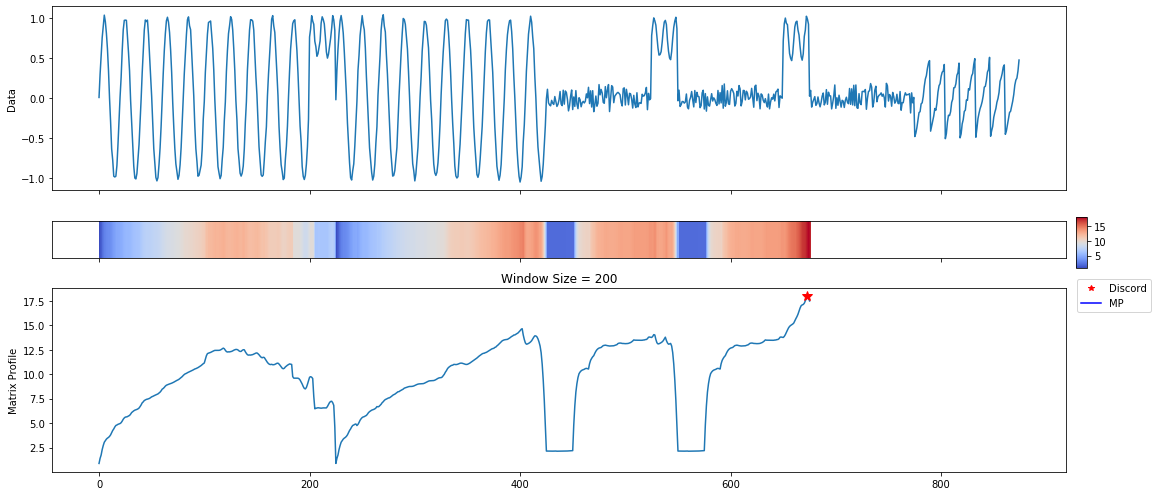

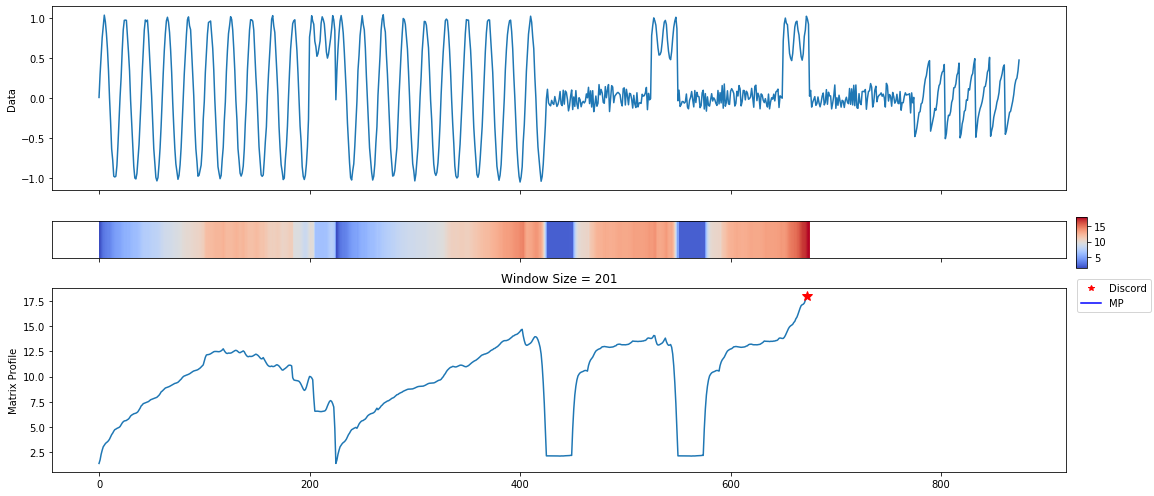

In [4]:
profile, figures = mp.analyze(ts)

A lot of useful plots are shown about the time series. The first plot shows all of the computed matrix profiles over the given window sizes. We can see that there are motifs where the shapes are similar. For example, at window sizes 200 and 32. The other plots show the top 3 discords and motifs across all of the computed MatrixProfiles.

## Pan-MatrixProfile Data Structure

The Pan-MatrixProfile is a Python dictionary with critical keys. These keys and values are expected to exist when using the visualize and discover functions.

```python
{
    # The computed matrix profiles as a 2D numpy array row-wise aligned with the
    # windows array.
    'pmp': pmp,
    
    # The matrix profile index as a 2D numpy array row-wise aligned with the
    # windows array.
    'pmpi': pmpi,
    
    # The original data passed in.
    'data': {
        'ts': ts,
    },
    
    # The windows used to compute the matrix profiles.
    'windows': np.array(windows),
    
    # The samples computed as a float from 0 to 1 of the windows.
    'sample_pct': sample_pct,
    
    # Euclidean or Pearson
    'metric': metric,
    
    # The internal algorithm used to compute the pan-matrixprofile.
    'algorithm': 'skimp',
    
    # The type of data structure. A matrixprofile is MatrixProfile.
    'class': 'PMP'
}
```

## Picking a MatrixProfile From Pan-MatrixProfile

You may find a specific MatrixProfile that you would like to examine further. You can easily extract a MatrixProfile from a Pan-MatrixProfile using the **[mp.utils.pick_mp](api.rst#matrixprofile.utils.pick_mp)** function.

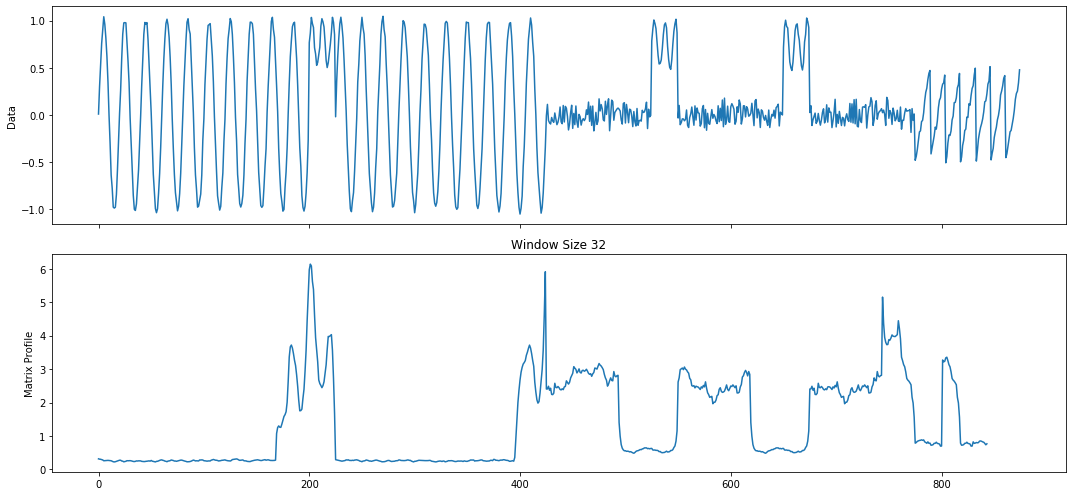

In [5]:
mp_profile = mp.utils.pick_mp(profile, 32)
mp_figures = mp.visualize(mp_profile)

## Analyzing MatrixProfile

Similar to analyzing a Pan-MatrixProfile, the analyze function enables you to review a MatrixProfile. The only difference here is that we pass in a single window and obtain results for the given MatrixProfile.

/home/tyler/src/matrixprofile/matrixprofile/visualize.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


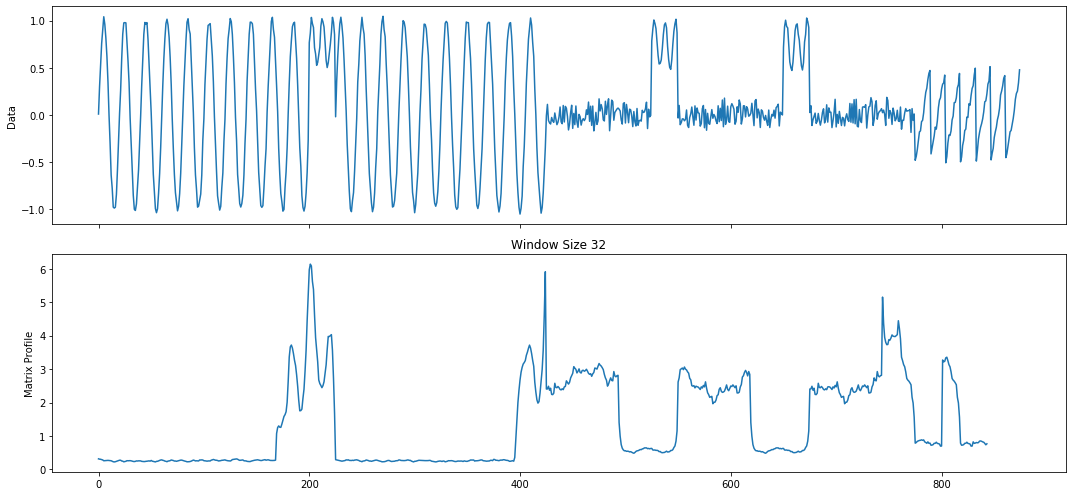

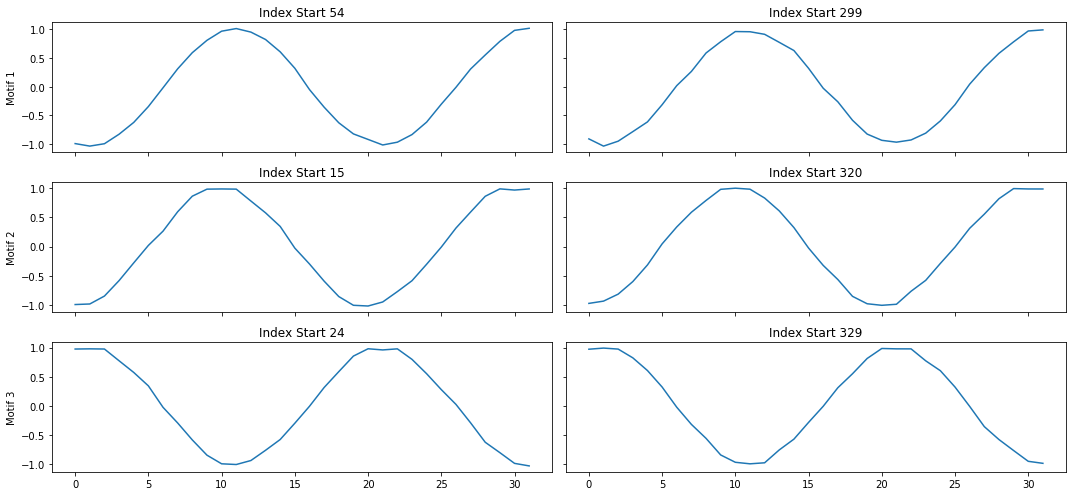

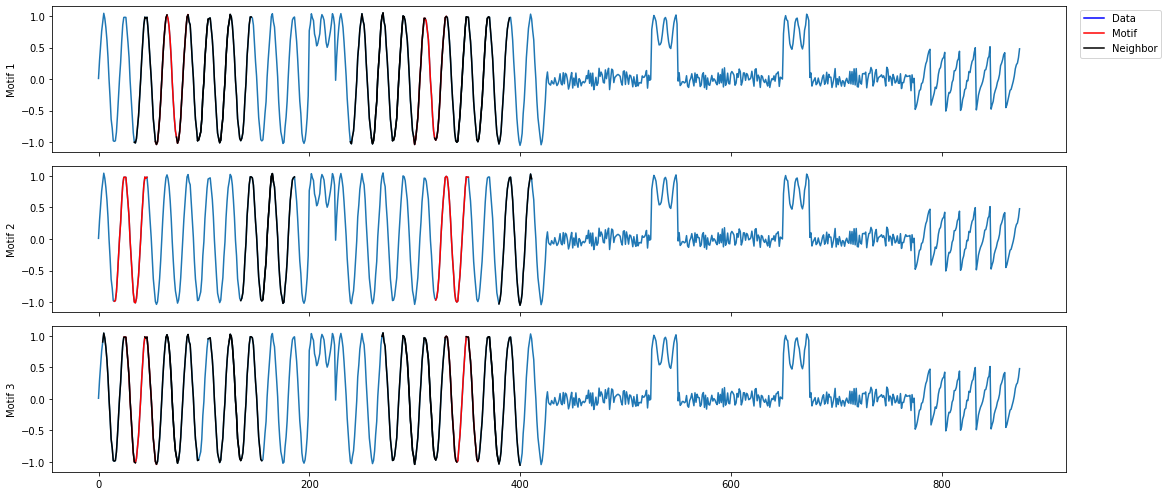

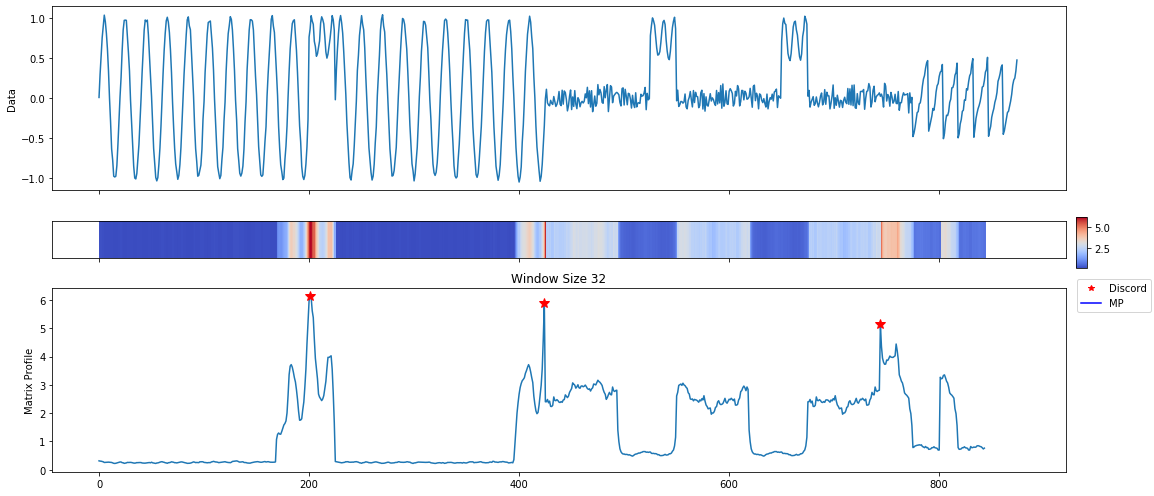

In [6]:
mp_profile, mp_figures = mp.analyze(ts, windows=32)

## MatrixProfile Data Structure

The MatrixProfile data structure is a Python dictionary with critical keys and values. The values must exist for discover and visualize functions to work properly.

```python
{
    # A numpy array of the matrix profile.
    'mp': The matrix profile,
    
    # The profile index as a numpy array.
    'pi': The matrix profile 1NN indices,
    
    # The right matrix profile as a numpy array.
    'rmp': The right matrix profile,
    
    # The right matrix profile indices as a numpy array.
    'rpi': The right matrix profile 1NN indices,
    
    # The left matrix profile as a numpy array.
    'lmp': The left matrix profile,
    
    # The left matrix profile indices as a numpy array.
    'lpi': The left matrix profile 1NN indices,
    
    # The distance metric in the matrix profile (Euclidean or Pearson).
    'metric': The distance metric computed for the mp,
    
    # The window size used.
    'w': The window size used to compute the matrix profile,
    
    # The exclusion zone for non-trivial matches.
    'ez': The exclusion zone used,
    
    # A flag specifying if a self-join or similarity join was computed.
    'join': Flag indicating if a similarity join was computed,
    
    # A float from 0 to 1 indicating how many samples were taken to compute the MP.
    'sample_pct': Percentage of samples used in computing the MP,
    
    # The original data where ts is the time series and query is the query.
    'data': {
        'ts': Time series data,
        'query': Query data if supplied
    }
    
    # This is used internally to determine what this data structure is.
    'class': "MatrixProfile"
    
    # The algorithm used to compute this matrix profile.
    'algorithm': "stomp"
}
```

## Computing MatrixProfile and Pan-MatrixProfile

The [mp.compute](api.rst#matrixprofile.compute) function works identically to the analyze function. The exception is that plots are not provided. To keep this section brief, I will only show a short example for both.

```python
# compute the Pan-MatrixProfile no windows
profile = mp.compute(ts)

# compute the Pan-MatrixProfile with windows
profile = mp.compute(ts, windows=[32, 64, 128])

# compute the MatrixProfile
profile = mp.compute(ts, windows=[32])

# specify all cpu cores
profile = mp.compute(ts, windows=[32], n_jobs=-1)
```

## Discover Motifs and Discords

Both the Pan-MatrixProfile and MatrixProfile data structures enable motif and discord discovery. A quick example follows, but please read the API docs to understand the parameters that may be tuned. Note that the functions understand which method to use based on the data structure. Calling the motifs and discords function is the same for Pan-MatrixProfile and MatrixProfile. These algorithms return the same "profile data structure" with an additional key of "motifs" or "discords".

```python
profile = mp.discover.motifs(profile)
profile = mp.discover.discords(profile)
```

## Visualize

Visualize is a high level function that when given a "profile data structure", it will provide plots accordingly. For example, when you only have the profile and not discords or motifs, it only plots the profile. A list of Matplotlib figures is returned to you so that you can save them if you wish.

Here is an example of visualizing a profile and saving figures to a file.

```python
figures = mp.visualize(profile)


for count, figure in enumerate(figures):
    figure.save('{}.png'.format(count))
```